In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('football.csv', index_col=0)

In [3]:
df.shape

(18207, 88)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

## Dropping columns from Analysis

In [5]:
df.drop(columns=['ID','Photo', 'Flag', 'Club Logo', 'Special', 'Jersey Number', 'Real Face', 'Loaned From'],axis=1 ,inplace=True)

## Data Cleaning

In [6]:
# First, lets clean data that is of type: Float or Int by filling in null values with either mean or median

df['International Reputation'].fillna(df['International Reputation'].mean(), inplace=True)
df['Weak Foot'].fillna(df['Weak Foot'].mean(), inplace=True)
df['Skill Moves'].fillna(df['Skill Moves'].mean(), inplace=True)
df['Weak Foot'].fillna(df['Weak Foot'].mean(), inplace=True)
df['Crossing'].fillna(df['Crossing'].mean(), inplace=True)
df['Finishing'].fillna(df['Finishing'].mean(), inplace=True)
df['Crossing'].fillna(df['Crossing'].mean(), inplace=True)
df['HeadingAccuracy'].fillna(df['HeadingAccuracy'].mean(), inplace=True)
df['ShortPassing'].fillna(df['ShortPassing'].mean(), inplace=True)
df['Volleys'].fillna(df['Volleys'].mean(), inplace=True)
df['Dribbling'].fillna(df['Dribbling'].mean(), inplace=True)
df['Curve'].fillna(df['Curve'].mean(), inplace=True)
df['FKAccuracy'].fillna(df['FKAccuracy'].mean(), inplace=True)
df['LongPassing'].fillna(df['LongPassing'].mean(), inplace=True)
df['BallControl'].fillna(df['BallControl'].mean(), inplace=True)
df['Acceleration'].fillna(df['Acceleration'].mean(), inplace=True)
df['SprintSpeed'].fillna(df['SprintSpeed'].mean(), inplace=True)
df['Agility'].fillna(df['Agility'].mean(), inplace=True)
df['Reactions'].fillna(df['Reactions'].mean(), inplace=True)
df['Balance'].fillna(df['Balance'].mean(), inplace=True)
df['ShotPower'].fillna(df['ShotPower'].mean(), inplace=True)
df['Jumping'].fillna(df['Jumping'].mean(), inplace=True)
df['Stamina'].fillna(df['Stamina'].mean(), inplace=True)
df['Strength'].fillna(df['Strength'].mean(), inplace=True)
df['LongShots'].fillna(df['LongShots'].mean(), inplace=True)
df['Aggression'].fillna(df['Aggression'].mean(), inplace=True)
df['Interceptions'].fillna(df['Interceptions'].mean(), inplace=True)
df['Positioning'].fillna(df['Positioning'].mean(), inplace=True)
df['Vision'].fillna(df['Vision'].mean(), inplace=True)
df['Penalties'].fillna(df['Penalties'].mean(), inplace=True)
df['Composure'].fillna(df['Composure'].mean(), inplace=True)
df['Marking'].fillna(df['Marking'].mean(), inplace=True)
df['StandingTackle'].fillna(df['StandingTackle'].mean(), inplace=True)
df['SlidingTackle'].fillna(df['SlidingTackle'].mean(), inplace=True)
df['GKDiving'].fillna(df['GKDiving'].mean(), inplace=True)
df['GKHandling'].fillna(df['GKHandling'].mean(), inplace=True)
df['GKKicking'].fillna(df['GKKicking'].mean(), inplace=True)
df['GKPositioning'].fillna(df['GKPositioning'].mean(), inplace=True)
df['GKReflexes'].fillna(df['GKReflexes'].mean(), inplace=True)

In [7]:
df.rename(columns={'Value':'MarketValue'}, inplace=True)

In [8]:
# convert value, wage and release clause into float and replace 'M', 'K', '€' strings
# 1million = 10,00,000

def convert_marketvalue_wage_release_clause(Value):
    if isinstance(Value, str):
        output = Value.replace('€', '')
        if 'M' in output:
            output = float(output.replace('M', '')) * 1000000
        elif 'K' in output:
            output = float(output.replace('K', '')) * 1000
        return float(output)

df['MarketValue'] = df['MarketValue'].apply(lambda x: convert_marketvalue_wage_release_clause(x))
df['Wage'] = df['Wage'].apply(lambda x: convert_marketvalue_wage_release_clause(x))
df['Release Clause'] = df['Release Clause'].apply(lambda x: convert_marketvalue_wage_release_clause(x))

# The Release Clause column has null values which we can now replace with mean or median values,
# since we have converted the respective data type from object to float

df['Release Clause'].fillna(df['Release Clause'].mean(), inplace=True)

In [9]:
# Now, lets try to fill null values for Categorical columns: Club and Position
df['Club'].fillna('Unknown Club', inplace=True)
df['Position'].fillna('Unknown Position', inplace=True)

In [10]:
# Clean the 'Joined' column to contain value of only the year
def clean_joined(Joined):
    var=[]
    if isinstance(Joined, str):
        var = Joined.split(",") 
        var = var[-1]
    return (var)

df['Joined'] = df['Joined'].apply((lambda x: clean_joined(x))).astype('str')

In [11]:
# Normalize player's height to cm

def normalize_height(x):
    l = []
    s = []
    if isinstance(x,str):
        l = x.split("'")
        i = int(l[-2])
        j = int(l[-1])
        s = ((i * 30.48) + (j * 2.54))
        return (s)
    
df['Height'] = df['Height'].apply(lambda x: normalize_height(x))
df['Height'].fillna(df['Height'].mean(), inplace=True)

In [12]:
# Normalize the player's weight
def normalize_weight(Weight):
    if isinstance(Weight, str):
        output = float(Weight.replace('lbs',''))
        output = float(output/2.205)
        return output
    
df['Weight'] = df['Weight'].apply(lambda x: normalize_weight(x))
df['Weight'].fillna(df['Weight'].mean(), inplace = True)

In [13]:
# Contract valid until column

df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'])
df['Contract Valid Until'].fillna('Not Available', inplace=True)

In [14]:
df['Work Rate'].value_counts()

Medium/ Medium    9810
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
Low/ Low            34
Name: Work Rate, dtype: int64

In [15]:
# Replace null values for Work Rate column

df['Work Rate'].fillna('Medium/ Medium', inplace=True)

In [16]:
df['Preferred Foot'].value_counts()

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

In [17]:
# Replace null values for Preferred Foot column
df['Preferred Foot'].fillna('Right', inplace=True)

In [18]:
# Body Type Column
df['Body Type'].value_counts()

Normal                 10595
Lean                    6417
Stocky                  1140
Messi                      1
C. Ronaldo                 1
Neymar                     1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Akinfenwa                  1
Name: Body Type, dtype: int64

In [19]:
df['Body Type'].replace({'Messi':'Lean', 'C. Ronaldo':'Normal', 'Neymar':'Lean','Courtois':'Lean', 'PLAYER_BODY_TYPE_25':'Normal', 'Shaqiri':'Stocky', 'Akinfenwa':'Stocky'}, inplace=True)

In [20]:
# Arsenal players from Germany and their international reputation

filt = (df['Nationality'] == 'Germany') & (df['Club'] == 'Arsenal')
df.loc[filt][['Name','Age','Potential']]

,Name,Age,Potential
74,M. Özil,29,86
131,B. Leno,26,87
281,S. Mustafi,26,84


In [21]:
grp = df.groupby(df['Club'])
grp[['Name','Age','MarketValue']].value_counts()[0:10]

Club                  Name             Age  MarketValue
 SSV Jahn Regensburg  A. Dej           26   925000.0       1
                      A. Fein          19   950000.0       1
                      B. Saller        25   925000.0       1
                      J. George        25   1200000.0      1
                      J. Föhrenbach    22   875000.0       1
                      J. Derstroff     26   625000.0       1
                      H. Hyseni        25   160000.0       1
                      H. Al Ghaddioui  27   475000.0       1
                      D. Volkmer       22   650000.0       1
                      A. Weis          28   725000.0       1
dtype: int64

In [22]:
# Which foot do German players preffer?

filt = df['Nationality'] == 'Germany'
df[filt]['Preferred Foot'].str.contains('Right').sum()

924

In [23]:
forward = ['LS' ,'ST' ,'RS' ,'LW' ,'LF' ,'CF' ,'RF' ,'RW']
mid = ['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM']
defence = ['LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

def convert_position(x):
    if isinstance(x,str):
        if x in forward:
            return 'forward'
        elif x in mid:
            return 'midfielder'
        elif x == 'GK':
            return 'goalkeeper'
        else:
            return 'defender'

df['Position'] = df['Position'].apply(lambda x: convert_position(x))

# Filter to read players of Germany along with their converted Position and Club

filt = df['Nationality']=='Germany'
df[filt][['Name','Club' ,'Position']]

,Name,Club,Position
11,T. Kroos,Real Madrid,midfielder
18,M. ter Stegen,FC Barcelona,goalkeeper
22,M. Neuer,FC Bayern München,goalkeeper
34,M. Hummels,FC Bayern München,defender
55,L. Sané,Manchester City,forward
...,...,...,...
18101,J. Hipper,TSV 1860 München,goalkeeper
18127,N. Stephan,FC Würzburger Kickers,goalkeeper
18145,M. Harsman,SV Meppen,goalkeeper
18187,C. Ehlich,SpVgg Unterhaching,defender


## Data Visualisation

### Number of Players per Position

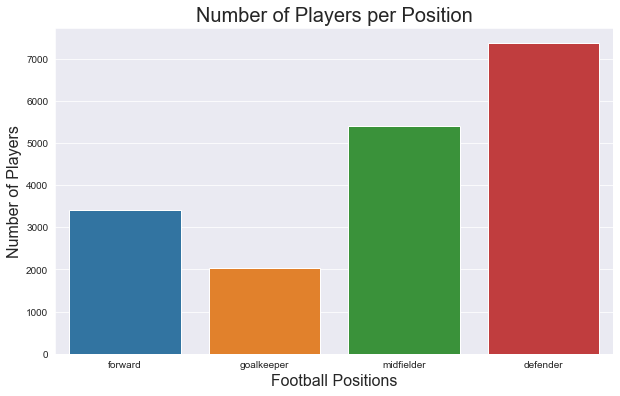

<Figure size 432x288 with 0 Axes>

In [24]:
plt.figure(figsize = (10, 6))
sns.countplot(x='Position', data = df)

plt.xlabel(xlabel = 'Football Positions', fontsize = 16)
plt.ylabel(ylabel = 'Number of Players', fontsize = 16)

plt.title(label = 'Number of Players per Position', fontsize = 20)

plt.show()

plt.savefig('PlayerPosition.png', dpi=100.0)

In [25]:
# Top players per position - forward 

filt = df['Position']=='forward'
df[filt][['Name','Club', 'Nationality', 'Overall']][0:10].style.background_gradient('Spectral')

,Name,Club,Nationality,Overall
0,L. Messi,FC Barcelona,Argentina,94
1,Cristiano Ronaldo,Juventus,Portugal,94
2,Neymar Jr,Paris Saint-Germain,Brazil,92
5,E. Hazard,Chelsea,Belgium,91
7,L. Suárez,FC Barcelona,Uruguay,91
10,R. Lewandowski,FC Bayern München,Poland,90
15,P. Dybala,Juventus,Argentina,89
16,H. Kane,Tottenham Hotspur,England,89
21,E. Cavani,Paris Saint-Germain,Uruguay,89
23,S. Agüero,Manchester City,Argentina,89


In [26]:
# Top players per position - midfield 

filt = df['Position']=='midfielder'
df[filt][['Name','Club', 'Nationality', 'Overall']][0:10].style.background_gradient('cividis')

,Name,Club,Nationality,Overall
4,K. De Bruyne,Manchester City,Belgium,91
6,L. Modrić,Real Madrid,Croatia,91
11,T. Kroos,Real Madrid,Germany,90
13,David Silva,Manchester City,Spain,90
17,A. Griezmann,Atlético Madrid,France,89
25,K. Mbappé,Paris Saint-Germain,France,88
26,M. Salah,Liverpool,Egypt,88
28,J. Rodríguez,FC Bayern München,Colombia,88
31,C. Eriksen,Tottenham Hotspur,Denmark,88
33,P. Aubameyang,Arsenal,Gabon,88


In [27]:
# Top players per position - defence

df[df['Position']=='defender'][['Name' ,'Club' ,'Nationality' ,'Overall']][0:10].style.background_gradient('Greens')

,Name,Club,Nationality,Overall
8,Sergio Ramos,Real Madrid,Spain,91
12,D. Godín,Atlético Madrid,Uruguay,90
14,N. Kanté,Chelsea,France,89
20,Sergio Busquets,FC Barcelona,Spain,89
24,G. Chiellini,Juventus,Italy,89
27,Casemiro,Real Madrid,Brazil,88
34,M. Hummels,FC Bayern München,Germany,88
35,Marcelo,Real Madrid,Brazil,88
39,Thiago Silva,Paris Saint-Germain,Brazil,88
42,S. Umtiti,FC Barcelona,France,87


### Weight measurement of different players

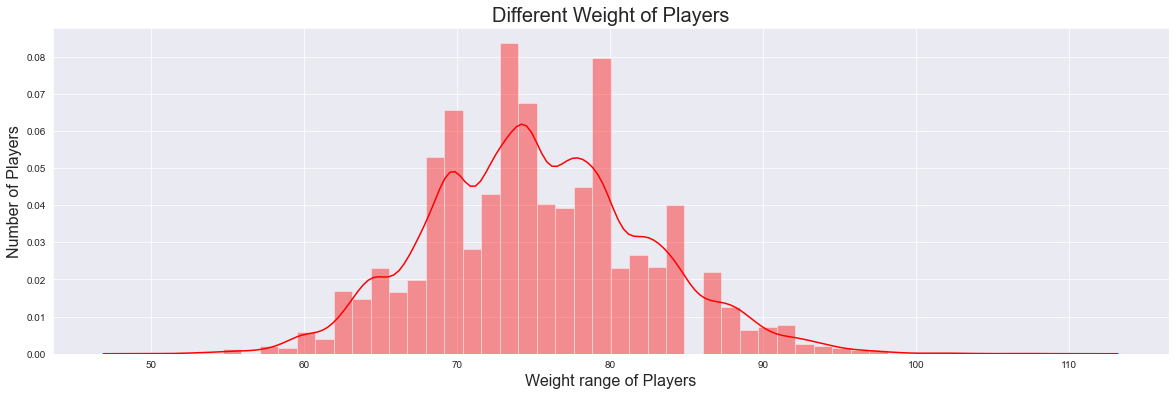

In [28]:
plt.figure(figsize=(20,6))

plt.style.use('tableau-colorblind10')
sns.distplot(df['Weight'], color = 'red')

plt.title('Different Weight of Players', fontsize = 20)
plt.xlabel('Weight range of Players', fontsize = 16)
plt.ylabel('Number of Players', fontsize = 16)

plt.savefig('Players_weight.png', dpi = 100)
plt.show()

### Height measurement of different players

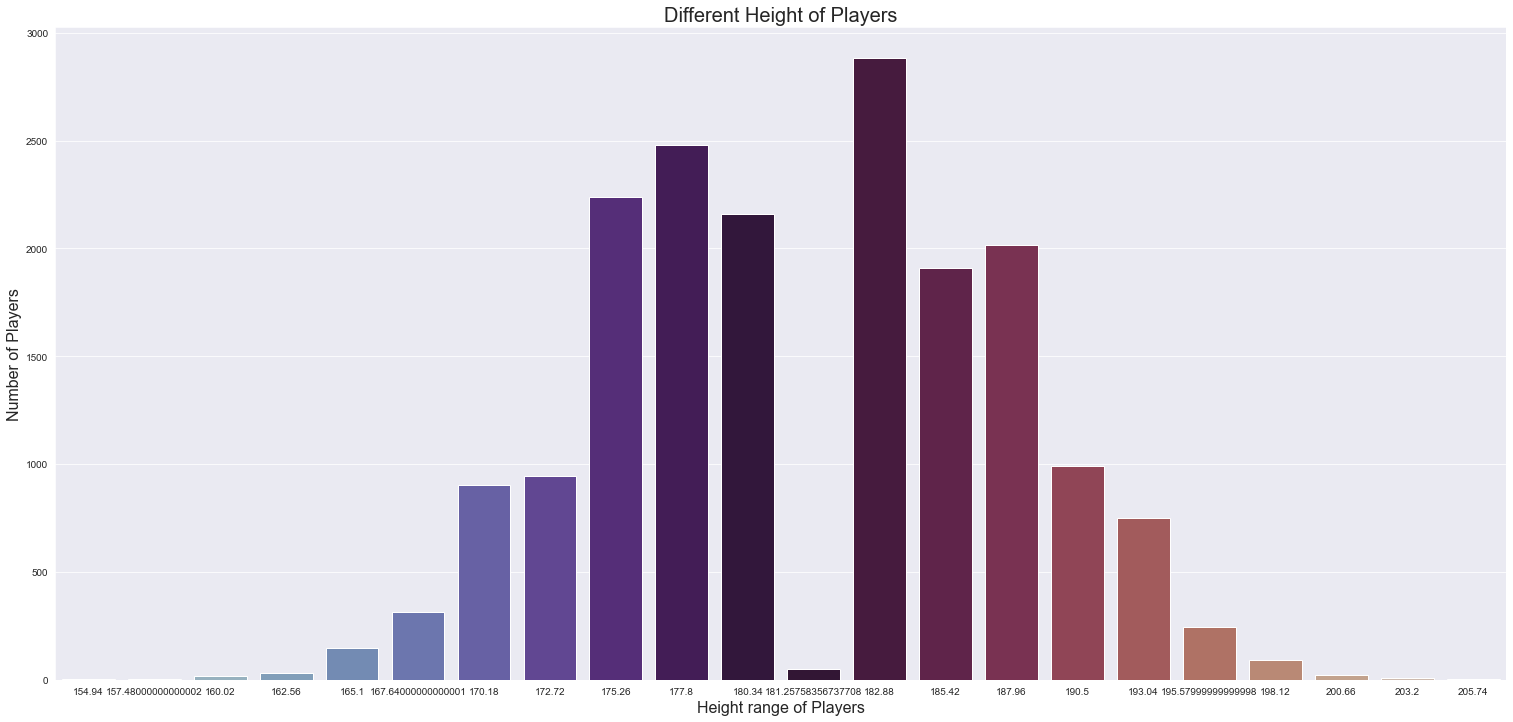

In [29]:
plt.figure(figsize=(26,12))
plt.style.use('tableau-colorblind10')

sns.countplot(df['Height'], color = 'blue', palette='twilight')

plt.title('Different Height of Players', fontsize = 20)
plt.xlabel('Height range of Players', fontsize = 16)
plt.ylabel('Number of Players', fontsize = 16)

plt.savefig('Players_height.png', dpi=80)
plt.show()

### Top 10 Clubs with highest average wages

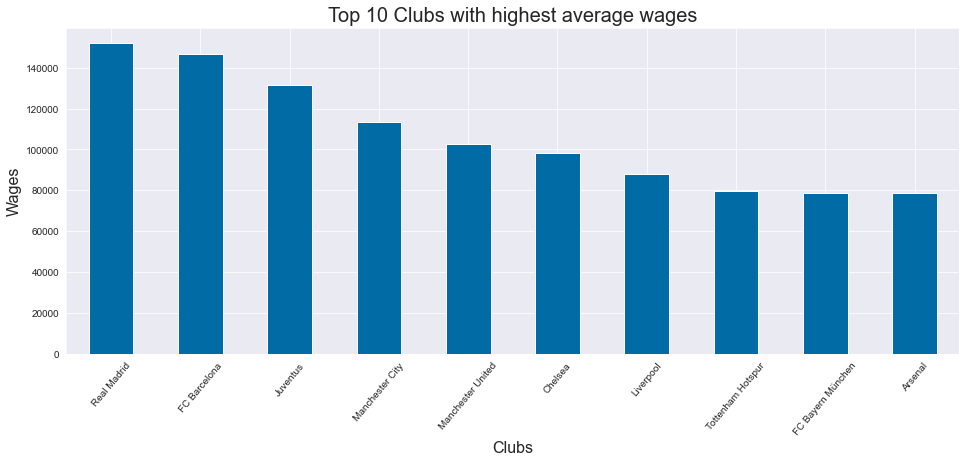

In [30]:
wage_info = df[['Name', 'Club', 'Wage']]

plt.figure(figsize=(16,6))
wage_info.groupby('Club')['Wage'].mean().sort_values(ascending=False).head(10).plot(kind = 'bar')

plt.title('Top 10 Clubs with highest average wages', fontsize = 20)
plt.xlabel('Clubs', fontsize = 16)
plt.ylabel('Wages', fontsize = 16)
plt.xticks(rotation=50)

plt.savefig('HighestWages.png', dpi=80)
plt.show()

### Top 10 clubs with highest overall ratings

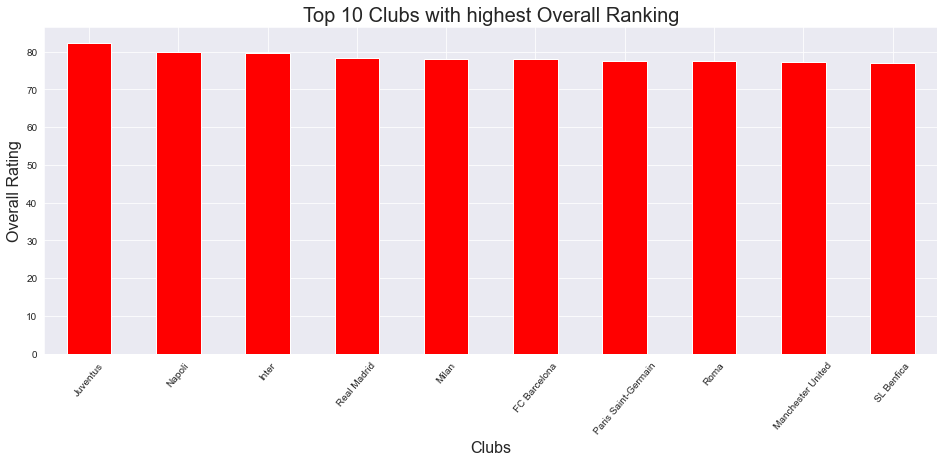

In [31]:
overall_list = df[['Name', 'Club', 'Overall']]

plt.figure(figsize=(16,6))
overall_list.groupby('Club')['Overall'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar', color='Red')

plt.title('Top 10 Clubs with highest Overall Ranking', fontsize = 20)
plt.xlabel('Clubs', fontsize = 16)
plt.ylabel('Overall Rating', fontsize = 16)
plt.xticks(rotation = 50)

plt.savefig('HighestRanking.png', dpi=80)
plt.show()

### Top 10 Clubs with highest Market Value

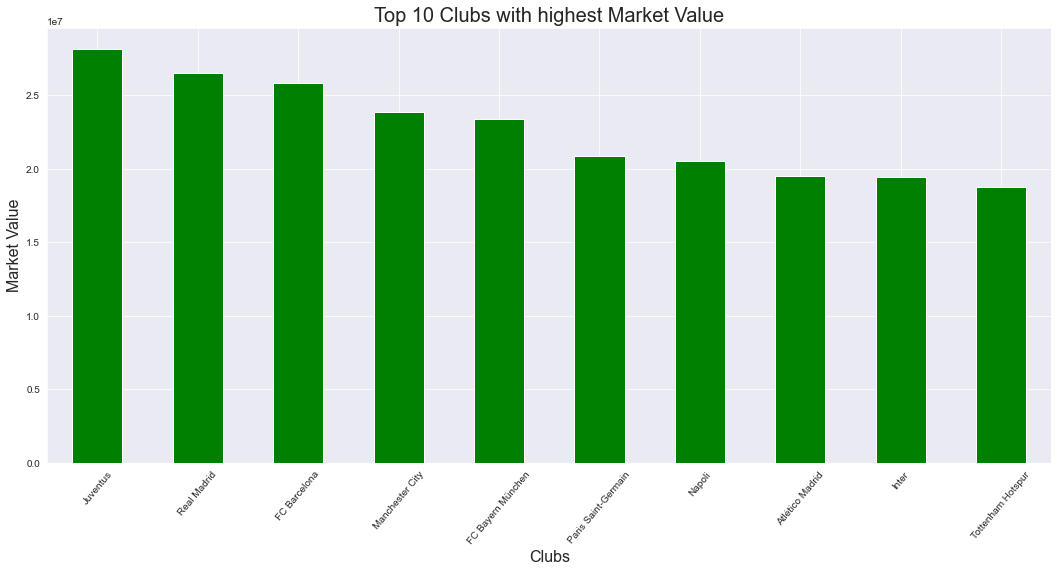

In [32]:
value_info = df[['Club','MarketValue', 'Release Clause']]

plt.figure(figsize=(18,8))
value_info.groupby('Club')['MarketValue'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'Green')

plt.title('Top 10 Clubs with highest Market Value', fontsize = 20)
plt.xlabel('Clubs', fontsize = 16)
plt.ylabel('Market Value', fontsize = 16)
plt.xticks(rotation = 50)

plt.savefig('HighestMarketValue.png', dpi=80)
plt.show()

### Weight vs Dribbling

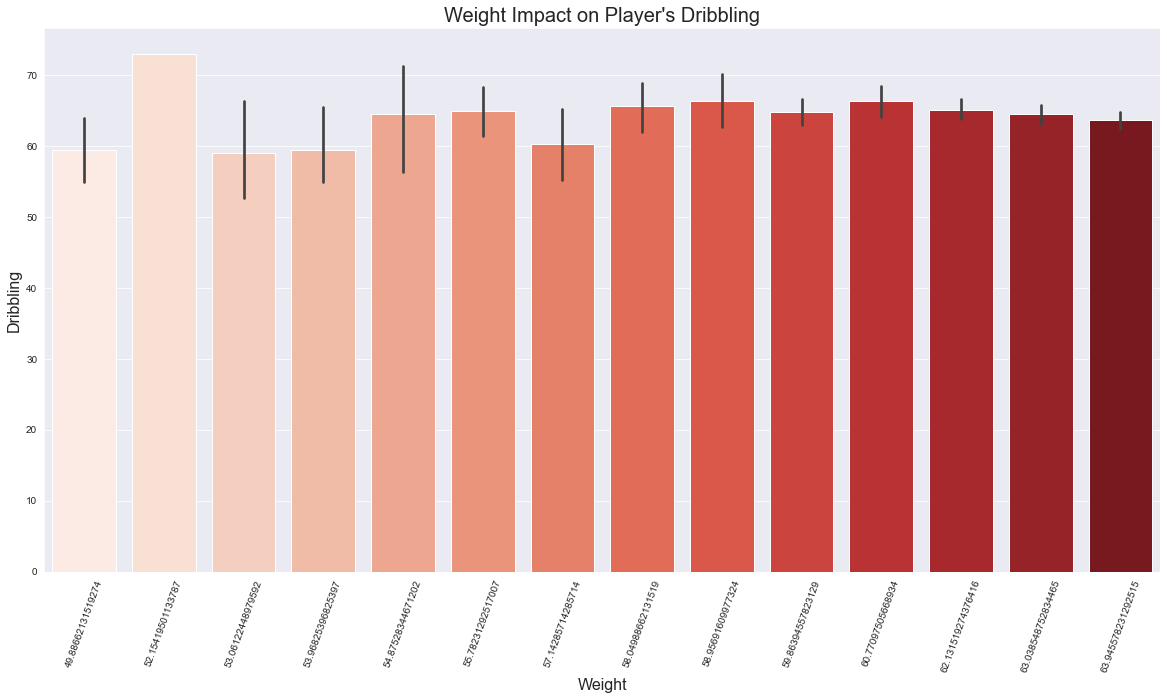

In [33]:
plt.figure(figsize=(20,10))

plt.xlabel('Weight',  fontsize = 16)
plt.ylabel('Dribbling', fontsize = 16)
plt.title("Weight Impact on Player's Dribbling", fontsize = 20)
plt.xticks(rotation = 70)

sns.barplot(x='Weight', y='Dribbling', data = df.sort_values('Weight').head(1000),palette='Reds')
plt.savefig('WeightVsDribbling.png', dpi = 100)

### Height vs Heading Accuracy

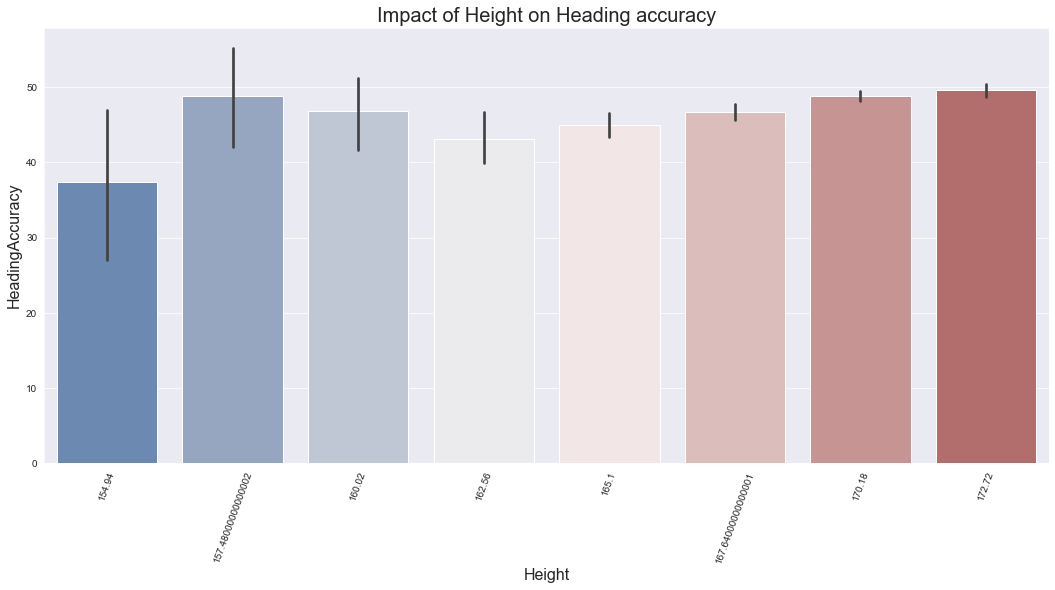

In [34]:
plt.figure(figsize=(18,8))

plt.xlabel('Height', fontsize = 16)
plt.ylabel('Heading Accuracy', fontsize = 16)
plt.title('Impact of Height on Heading accuracy', fontsize = 20)
plt.xticks(rotation = 70)

sns.barplot(x='Height', y='HeadingAccuracy', data=df.sort_values('Height').head(2000),palette='vlag')
plt.savefig('HeightVsHeading.png', dip = 100.0)

In [35]:
TODO: ('Weight vs Stamina', 'Height vs Dribbling')

Text(0.5, 1.0, 'Age Distribution of Players')

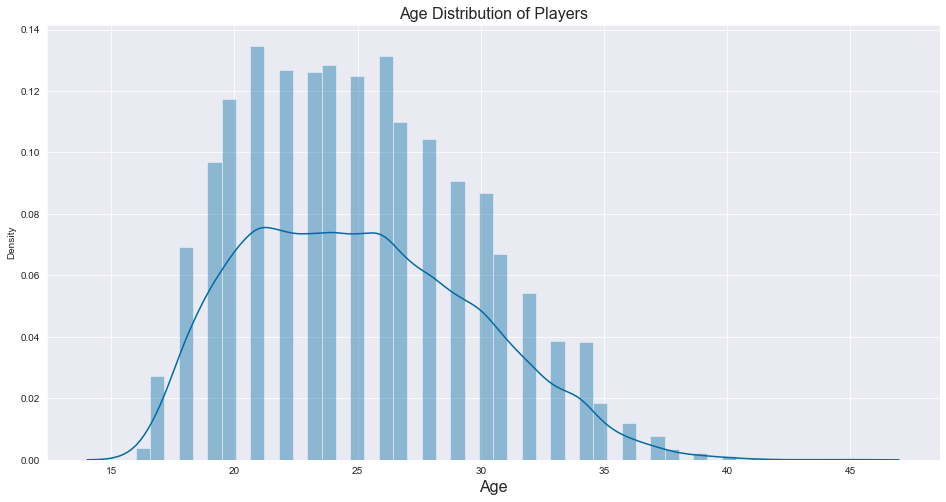

In [36]:
plt.figure(figsize=(16,8))
sns.distplot(df['Age'])

plt.xlabel('Age', fontsize = 16)
plt.title('Age Distribution of Players', fontsize = 16)

### Age Distribution per Player Nationalities

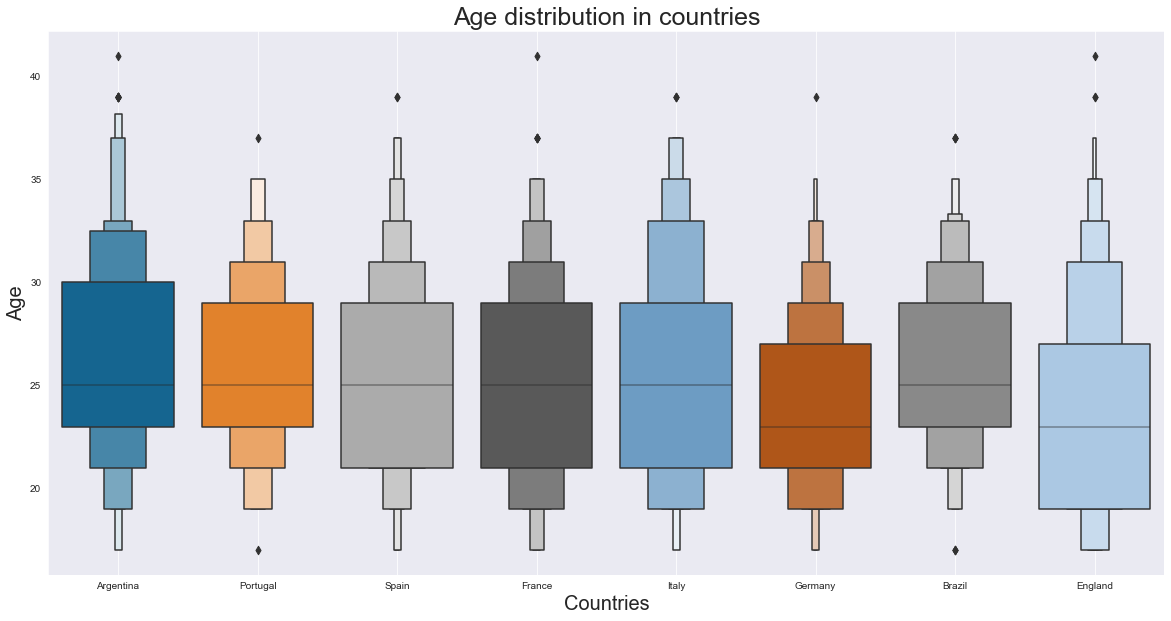

In [37]:
countries_names = ('France', 'Brazil', 'Germany', 'Spain', 'Argentina', 'Portugal', 'England', 'Italy')
countries = df.loc[df['Nationality'].isin(countries_names) & df['Age']]
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.boxenplot(x="Nationality", y="Age", data=countries)
ax.set_title(label='Age distribution in countries', fontsize=25)
plt.xlabel('Countries', fontsize=20)
plt.ylabel('Age', fontsize=20)
plt.savefig('AgeAndNationality.png', dpi=80)
plt.grid()

# Analysis show Argentina has wide range of age distribution.
# Germany and England tend to have a younger team.

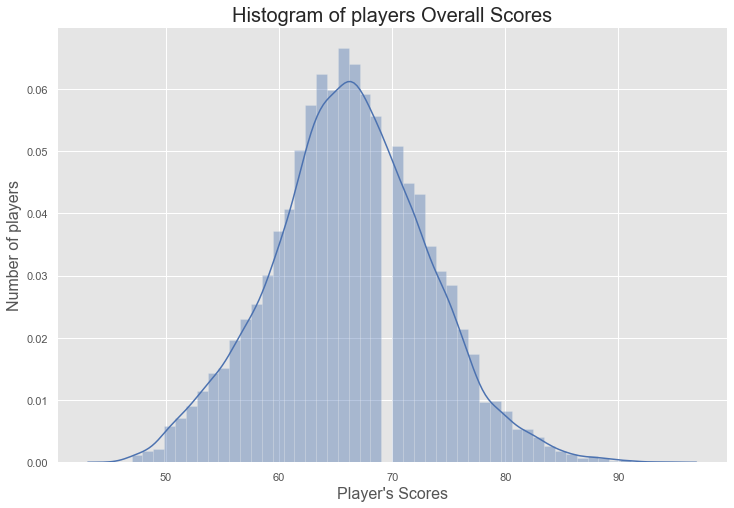

In [38]:
# Distribution of player's Overall score

sns.set(style = "dark", palette = "deep", color_codes = True)
x = df.Overall
plt.figure(figsize = (12,8))
plt.style.use('ggplot')

ax = sns.distplot(x,color = 'b')
ax.set_xlabel(xlabel = "Player\'s Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players Overall Scores', fontsize = 20)
plt.savefig('PlyerOverall.png', dpi=80)

plt.show()

### Top 10 left footed footballers

In [39]:
df[df['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club', 'Nationality']].head(10).style.background_gradient('plasma')

,Name,Age,Club,Nationality
0,L. Messi,31,FC Barcelona,Argentina
13,David Silva,32,Manchester City,Spain
15,P. Dybala,24,Juventus,Argentina
17,A. Griezmann,27,Atlético Madrid,France
19,T. Courtois,26,Real Madrid,Belgium
24,G. Chiellini,33,Juventus,Italy
26,M. Salah,26,Liverpool,Egypt
28,J. Rodríguez,26,FC Bayern München,Colombia
35,Marcelo,30,Real Madrid,Brazil
36,G. Bale,28,Real Madrid,Wales


### Top 10 right footed footballers

In [40]:
df[df['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club', 'Nationality']].head(10).style.background_gradient('winter_r')

,Name,Age,Club,Nationality
1,Cristiano Ronaldo,33,Juventus,Portugal
2,Neymar Jr,26,Paris Saint-Germain,Brazil
3,De Gea,27,Manchester United,Spain
4,K. De Bruyne,27,Manchester City,Belgium
5,E. Hazard,27,Chelsea,Belgium
6,L. Modrić,32,Real Madrid,Croatia
7,L. Suárez,31,FC Barcelona,Uruguay
8,Sergio Ramos,32,Real Madrid,Spain
9,J. Oblak,25,Atlético Madrid,Slovenia
10,R. Lewandowski,29,FC Bayern München,Poland


### Players Head to Head Comparison

In [41]:
skills = ['Overall', 'Potential', 'Crossing',
   'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
   'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
   'Reactions', 'Balance', 'ShotPower',
   'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
   'Interceptions', 'Positioning', 'Vision', 'Penalties',
   'Marking', 'StandingTackle', 'SlidingTackle']

In [ ]:
player1=input()
player2=input()


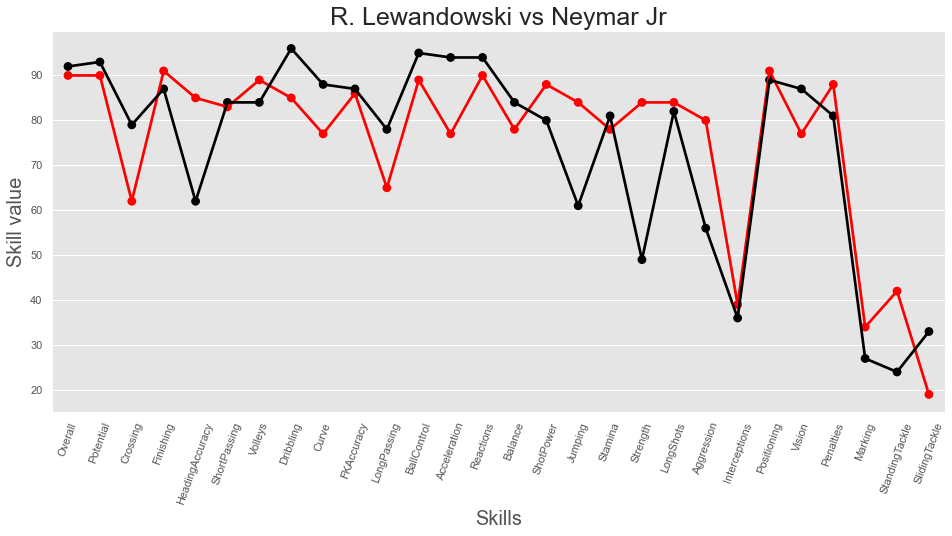

In [43]:
p1 = df.loc[df['Name'] == player1]
p1 = pd.DataFrame(p1, columns = skills)
p2 = df.loc[df['Name'] == player2]
p2 = pd.DataFrame(p2, columns = skills)

plt.figure(figsize=(16,7))

sns.pointplot(data=p1,color='red')
sns.pointplot(data=p2, color='black')

plt.xticks(rotation=70)
plt.xlabel('Skills', fontsize=20)
plt.ylabel('Skill value', fontsize=20)
plt.title(player1+' vs '+player2, fontsize = 25)
plt.savefig('PlayersHeadToHead.png', dpi=80)

plt.show();